# NLP Preprocessing  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [4]:
train = pd.read_csv('tweets.csv')

In [5]:
train

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


### Basic Exploration

In [6]:
train.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [7]:
train.duplicated().sum()

0

In [8]:
train = train.drop_duplicates().reset_index(drop=True)

In [9]:
train.target.value_counts()

target
0    9256
1    2114
Name: count, dtype: int64

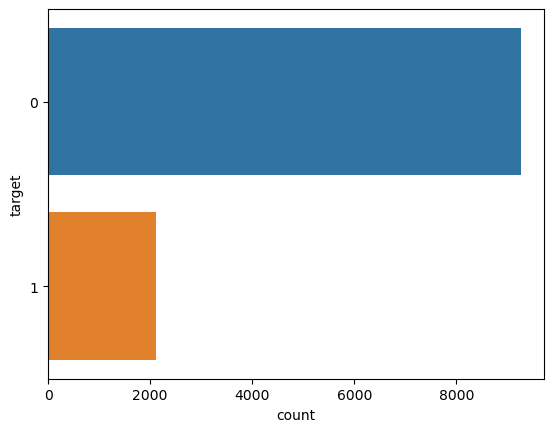

In [10]:
sns.countplot(y=train.target);

### Missing Values

In [11]:
train.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

### Check number of unique keywords

In [12]:
print (train.keyword.nunique())

219


### Most common keywords

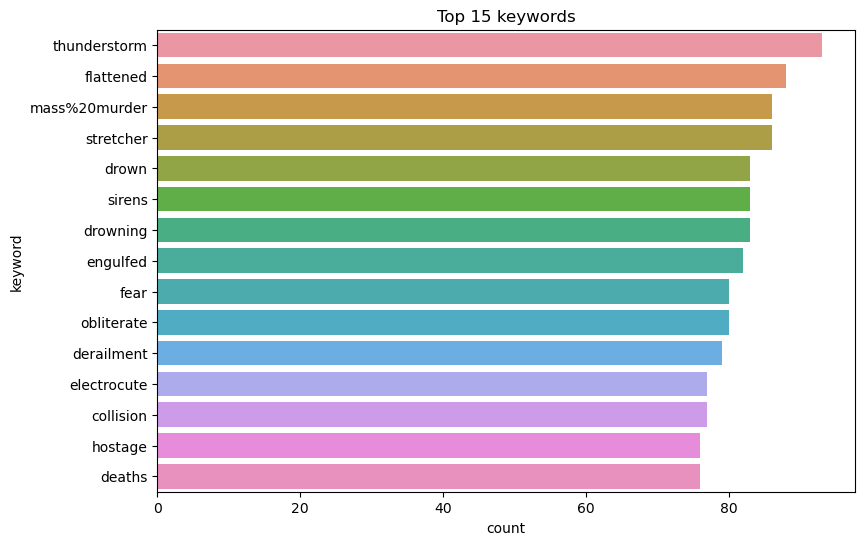

In [21]:
plt.figure(figsize=(9,6))
sns.countplot(y=train.keyword, order = train.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

In [30]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)


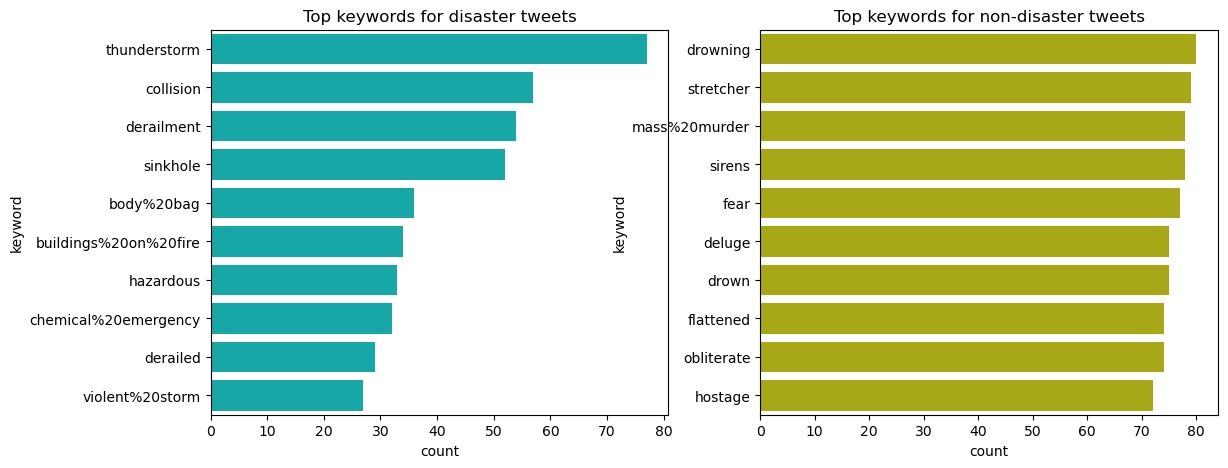

In [34]:
plt.figure(figsize=(13, 5))

plt.subplot(121)
sns.barplot(x=kw_d, y=kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')

plt.subplot(122)
sns.barplot(x=kw_nd, y=kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')

plt.show()

### Check number of unique keywords and locations

In [35]:
train.location.nunique()

4504

### Most common locations

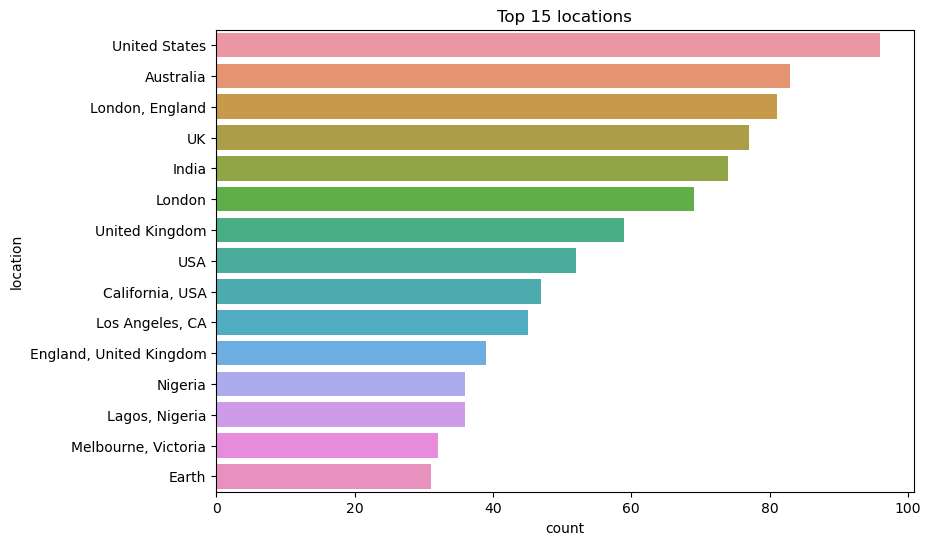

In [41]:
plt.figure(figsize=(9,6))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

###  Percentage of disaster tweets for common locations

In [46]:
raw_loc = train.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = train[train.location.isin(top_loc)]

### Ensure that only numeric columns are aggregated

In [48]:
top_l = top_only.groupby('location')['target'].mean().sort_values(ascending=False)

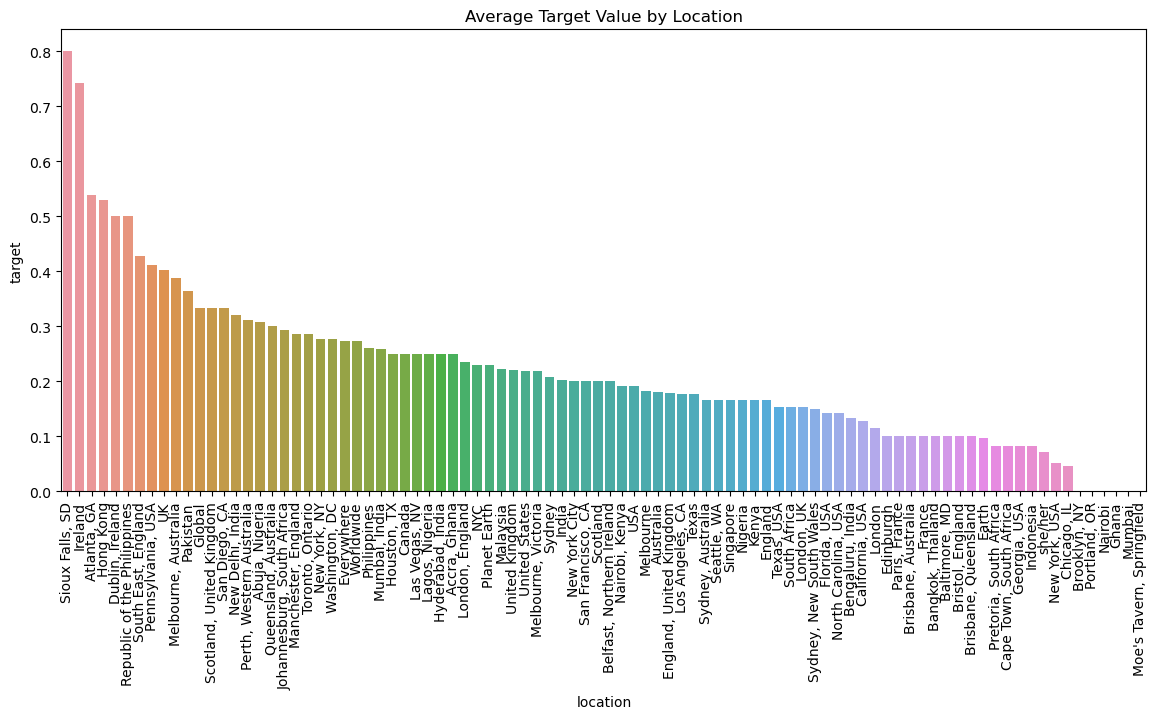

In [53]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_l.index, y=top_l)
plt.title('Average Target Value by Location')
plt.xticks(rotation=90)
plt.show()